In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-catsvsdogs-dataset/readme[1].txt
/kaggle/input/microsoft-catsvsdogs-dataset/MSR-LA - 3467.docx
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6234.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1269.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3863.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6241.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10304.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/623.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2193.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11925.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3750.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11378.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2008.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10730.jpg
/kaggle/input/micros

# The Universal Work Flow of Machine Learning:


1. Defining the problem and assembling a dataset
*     What will your input data be, what are you trying to predict.
*     You hypothesize that your outputs can be predicted given your inputs.
*     You hypothesize that your available data is sufficiently informative to learn the relationship between inputs and outputs.
*     "Nonstationary problems": ex. Shopping.
2. Choosing the measure of success
*     Define what you mean by success.
*     Accuracy, Precision, Recall, Customer retention rate, ROC AUC.
*     For class imbalence problems use Precision and Recall.
*     For ranking problems or multilabel classification, use Mean Average Precision.
*     Define your own metric by which to measure success.
3. Deciding on an evaluation protocol
*     Measure how you will measure your current progress.
*     Maintaining a hold-out validation set.
*     Doing K-fold cross-validation.
*     Doing iterated K-fold validation.
4. Preparing your data
*     Format as tensors.
*     Scale to small values: [-1, 1], [0, 1].
*     Normalize.
*     Feature Engineering if data is small.
5. Developing a model that does better than a baseline
*     Last Layer Activation Choice.
*     Loss Function Choice: Should be computable for as little as a single data point, must be differentiable.
*     Optimization Configuration.
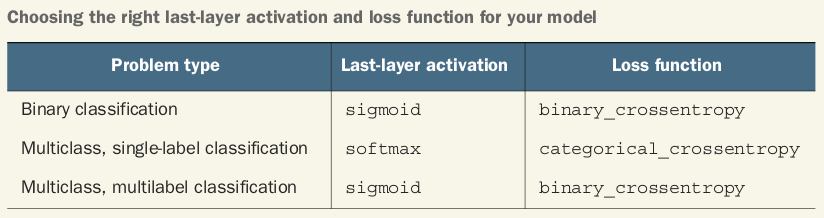
6. Scaling up: Developing a model that overfits
*     Is your model sufficiently powerful?
*     Always monitor the training loss and validation loss, as well as the training and validation values for any metrics you care about. When you see that the model’s performance on the validation data begins to degrade, you’ve achieved overfitting.
*     Here are some things you should try:
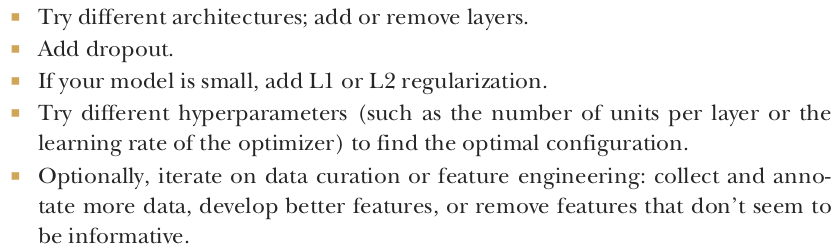
*     Every time you use feedback from your validation process to tune your model, you leak information about the validation process into the model.
*     Once you’ve developed a satisfactory model configuration, you can train your final production model on all the available data (training and validation) and evaluate it one last time on the test set.

# Convolutional Neural Networks

**First Example: Hand Written Digits Recognition on MNIST**

In [4]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()
trainImages = trainImages.reshape((trainImages.shape[0], trainImages.shape[1], trainImages.shape[2], 1))
trainImages = trainImages.astype('float32')/255
testImages = testImages.reshape((testImages.shape[0], testImages.shape[1], testImages.shape[2], 1))
testImages = testImages.astype('float32')/255
trainLabels = to_categorical(trainLabels)
testLabels = to_categorical(testLabels)


In [12]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainImages, trainLabels, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8656 - loss: 0.4132
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9847 - loss: 0.0500
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9893 - loss: 0.0343
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9924 - loss: 0.0241
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9946 - loss: 0.0184


In [13]:
testLoss, testAcc = model.evaluate(testImages, testLabels)
print(testLoss, testAcc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9883 - loss: 0.0365
0.02744666486978531 0.991599977016449


In [1]:
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

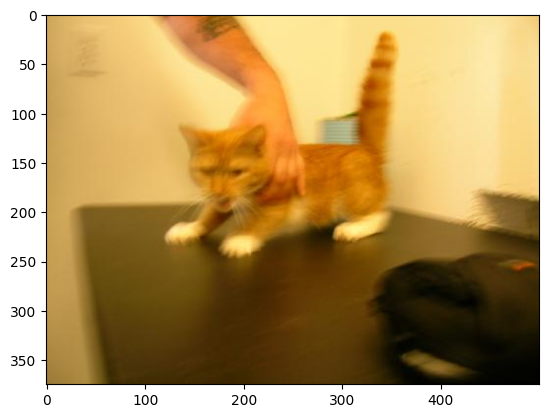

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image using matplotlib's image module
img = mpimg.imread('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/0.jpg')

# Display the image
plt.imshow(img)
plt.show()


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
class_names = ['Cat', 'Dog'] 

n_dogs = len(os.listdir('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog'))
n_cats = len(os.listdir('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat'))
n_images = [n_cats, n_dogs]

In [4]:
print(n_cats, n_dogs)

12501 12501


In [5]:
os.mkdir('/tmp/cats-v-dogs')

In [6]:
os.mkdir('/tmp/cats-v-dogs/training')
os.mkdir('/tmp/cats-v-dogs/validation')
os.mkdir('/tmp/cats-v-dogs/test')
os.mkdir('/tmp/cats-v-dogs/training/cats')
os.mkdir('/tmp/cats-v-dogs/training/dogs')
os.mkdir('/tmp/cats-v-dogs/validation/cats')
os.mkdir('/tmp/cats-v-dogs/validation/dogs')
os.mkdir('/tmp/cats-v-dogs/test/cats')
os.mkdir('/tmp/cats-v-dogs/test/dogs')

In [7]:
os.listdir('/tmp/cats-v-dogs')

['validation', 'test', 'training']

In [8]:
inputCatDir = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat'
inputDogDir = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog'

In [25]:
trainDir = "/tmp/cats-v-dogs/training"
ValidDir = "/tmp/cats-v-dogs/validation"
testDir = "/tmp/cats-v-dogs/test"

In [10]:
trainCatDir = '/tmp/cats-v-dogs/training/cats'
trainDogDir = '/tmp/cats-v-dogs/training/dogs'

In [11]:
validCatDir = '/tmp/cats-v-dogs/validation/cats'
validDogDir = '/tmp/cats-v-dogs/validation/dogs'

In [12]:
testCatDir = '/tmp/cats-v-dogs/test/cats'
testDogDir = '/tmp/cats-v-dogs/test/dogs'

In [13]:
print(trainCatDir, '\n', trainDogDir, '\n' , validCatDir, '\n' , validDogDir, '\n' , testCatDir, '\n' , testDogDir)

/tmp/cats-v-dogs/training/cats 
 /tmp/cats-v-dogs/training/dogs 
 /tmp/cats-v-dogs/validation/cats 
 /tmp/cats-v-dogs/validation/dogs 
 /tmp/cats-v-dogs/test/cats 
 /tmp/cats-v-dogs/test/dogs


In [14]:
origCatDataDir = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat'
origDogDataDir = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog'

In [15]:
len(os.listdir('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat'))

12501

In [59]:
# # Code to remove files from a directory
# os.listdir('/tmp/cats-v-dogs/validation/cats/')

# # Get list of files in the directory
# files = os.listdir('/tmp/cats-v-dogs/validation/cats/')
    
# # Iterate over each file and remove it
# for file in files:
#     file_path = os.path.join('/tmp/cats-v-dogs/validation/cats/', file)
#     if os.path.isfile(file_path):
#         os.remove(file_path)
#         print(f"Removed file: {file_path}")

fnames = ['{}.jpg'.format(i) for i in range(2000, 2500)]
for fname in fnames:
    src = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/', fname)
    dst = os.path.join('/tmp/cats-v-dogs/validation/cats/', fname)
    shutil.copyfile(src, dst)
len(os.listdir('/tmp/cats-v-dogs/validation/cats/'))



for fname in fnames:
    src = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/', fname)
    dst = os.path.join('/tmp/cats-v-dogs/validation/dogs/', fname)
    shutil.copyfile(src, dst)
len(os.listdir('/tmp/cats-v-dogs/validation/dogs/'))

500

In [16]:
import shutil

fnames = ['{}.jpg'.format(i) for i in range(1000)]
# Copy 1000 cat images to training folder
for fname in fnames:
    src = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/', fname)
    dst = os.path.join('/tmp/cats-v-dogs/training/cats/', fname)
    shutil.copyfile(src, dst)
len(os.listdir('/tmp/cats-v-dogs/training/cats/'))

# Copy 500 cat images to Validation folder

fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/', fname)
    dst = os.path.join('/tmp/cats-v-dogs/validation/cats/', fname)
    shutil.copyfile(src, dst)
len(os.listdir('/tmp/cats-v-dogs/validation/cats/'))

# Copy 500 cat images to test folder
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/', fname)
    dst = os.path.join('/tmp/cats-v-dogs/test/cats/', fname)
    shutil.copyfile(src, dst)
len(os.listdir('/tmp/cats-v-dogs/test/cats/'))

500

In [17]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
# Copy 1000 dog images to training folder
for fname in fnames:
    src = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/', fname)
    dst = os.path.join('/tmp/cats-v-dogs/training/dogs/', fname)
    shutil.copyfile(src, dst)
len(os.listdir('/tmp/cats-v-dogs/training/dogs/'))

# Copy 500 dog images to Validation folder

fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/', fname)
    dst = os.path.join('/tmp/cats-v-dogs/validation/dogs/', fname)
    shutil.copyfile(src, dst)
len(os.listdir('/tmp/cats-v-dogs/validation/dogs/'))

# Copy 500 dog images to test folder

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/', fname)
    dst = os.path.join('/tmp/cats-v-dogs/test/dogs/', fname)
    shutil.copyfile(src, dst)
len(os.listdir('/tmp/cats-v-dogs/test/dogs/'))

500

In [18]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')),
len(os.listdir('/tmp/cats-v-dogs/validation/cats/')),
len(os.listdir('/tmp/cats-v-dogs/test/cats/')),
len(os.listdir('/tmp/cats-v-dogs/training/dogs/')),
len(os.listdir('/tmp/cats-v-dogs/validation/dogs/')),
len(os.listdir('/tmp/cats-v-dogs/test/dogs/')))

1000 500 500 1000 500 500


In [19]:
# Building the Network

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()



2024-05-08 15:33:35.397912: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 15:33:35.398057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 15:33:35.514730: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,503,809 (5.74 MB)

 Trainable params: 1,503,809 (5.74 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainDataGen = ImageDataGenerator(rescale = 1./255)
testDataGen = ImageDataGenerator(rescale = 1./255)

trainGenerator = trainDataGen.flow_from_directory(
    trainDir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

ValidGenerator = testDataGen.flow_from_directory(
    ValidDir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)


for dataBatch, labelsBatch in trainGenerator:
    print('data batch shape: ', dataBatch.shape)
    print('labels batch shape: ', labelsBatch.shape)
    break
print(labelsBatch)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)
[0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.]


# Latest Code

In [20]:
from tensorflow.keras.utils import image_dataset_from_directory

In [31]:
trainDataset = image_dataset_from_directory( 
    trainDir, 
    image_size=(150, 150), 
    batch_size = 20
)

validDataset = image_dataset_from_directory(
    ValidDir,
    image_size=(150, 150), 
    batch_size = 20
)

testDataset = image_dataset_from_directory(
    testDir,
    image_size=(150, 150), 
    batch_size = 20
)

for dataBatch, labelsBatch in trainDataset:
    print('data batch shape: ', dataBatch.shape)
    print('labels batch shape: ', labelsBatch.shape)
    break
print(labelsBatch)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)
tf.Tensor([0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1], shape=(20,), dtype=int32)


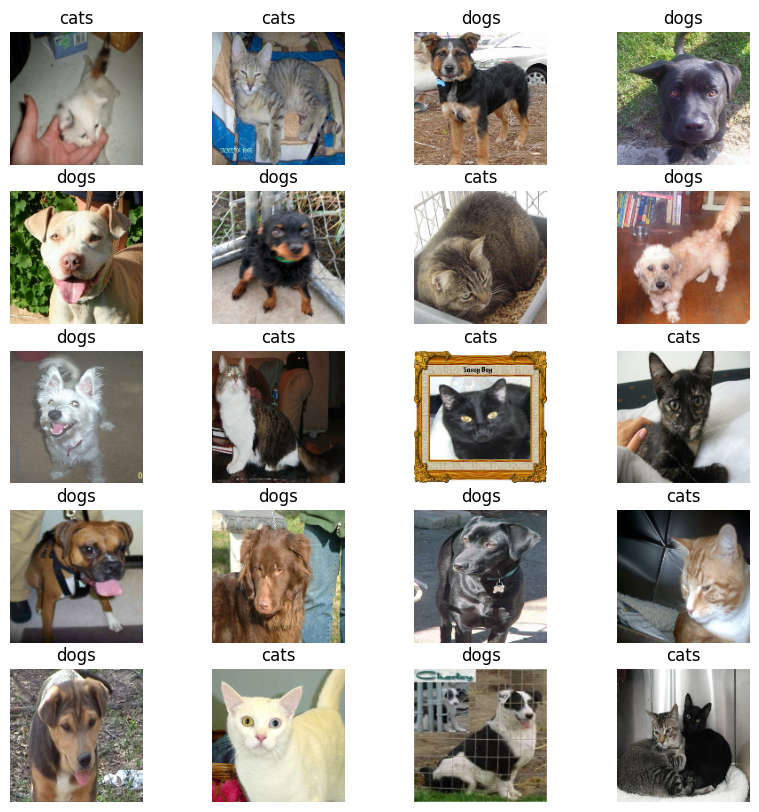

Validation Data


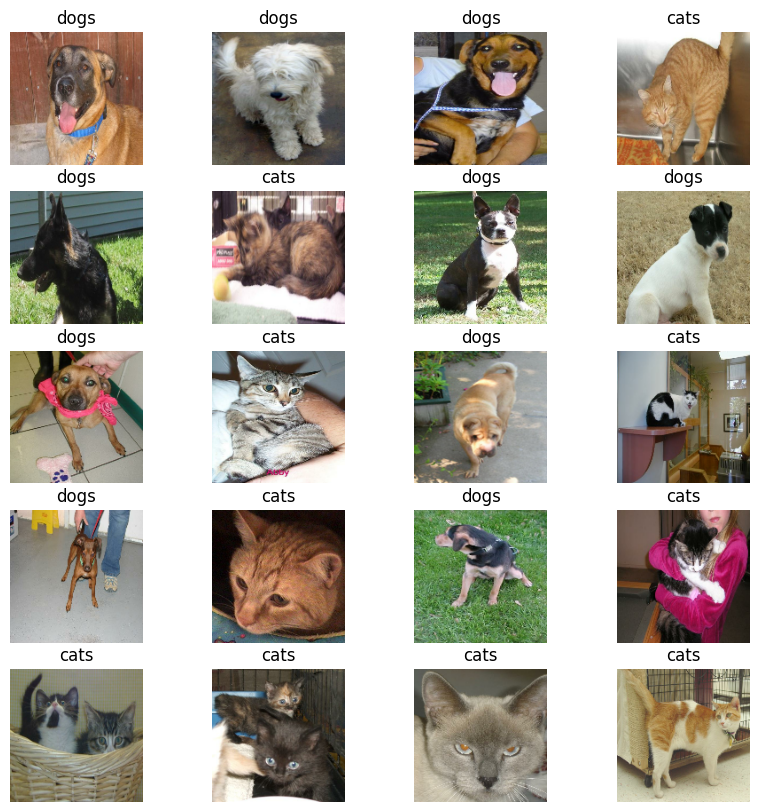

In [37]:
import matplotlib.pyplot as plt

# Iterate over the dataset to display images
for images, labels in trainDataset.take(1):  
    plt.figure(figsize=(10, 10))
    for i in range(20):  
        ax = plt.subplot(5, 4, i + 1)  # Create subplot for each image
        plt.imshow(images[i].numpy().astype("uint8"))  
        plt.title(trainDataset.class_names[labels[i]])  
        plt.axis("off")  
    plt.show()
    
print('Validation Data')

for images, labels in validDataset.take(1):  # Take two batches of data
    plt.figure(figsize=(10, 10))
    for i in range(20):  
        ax = plt.subplot(5, 4, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8"))  
        plt.title(trainDataset.class_names[labels[i]])  
        plt.axis("off")  
    plt.show()


In [43]:
result = model.fit(trainDataset, epochs = 3)

Epoch 1/3
  8/100 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5873 - loss: 5.7888

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_4]]
  (1) INVALID_ARGUMENT:  Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_one_step_on_iterator_3788]

In [44]:
print(trainDir, testDir, ValidDir)

/tmp/cats-v-dogs/training /tmp/cats-v-dogs/test /tmp/cats-v-dogs/validation
